In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

: 

In [ ]:
# Install Tensorflow
%pip install tf-nightly

: 

In [ ]:
# Import Tensorflow and related libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from IPython.display import Image

In [ ]:
# Define path for dataset
import pathlib
path = "/content/drive/MyDrive/Dataset"
data_dir = pathlib.Path(path)

In [ ]:
# Define image size
img_height = 200
img_width = 150
batch_size = 5

In [ ]:
# Data preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

Found 40 files belonging to 2 classes.
Using 32 files for training.
Found 40 files belonging to 2 classes.
Using 8 files for validation.
0.0015701812 0.6873644


In [ ]:
# Check class names
class_names = train_ds.class_names
print(class_names)

['Normal', 'Scoliosis']


In [ ]:
# Define CNN model
num_classes = 2
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

In [ ]:
# Compile the CNN model
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 75, 16)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 75, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 37, 64)        1

In [ ]:
# Train model
epochs=10
history = model.fit(train_ds,
validation_data=val_ds,
epochs=epochs)

Epoch 1/10
7/7 [==============================] - 5s 552ms/step - loss: 1.1749 - accuracy: 0.4688 - val_loss: 0.6965 - val_accuracy: 0.3750
Epoch 2/10
7/7 [==============================] - 2s 336ms/step - loss: 0.6774 - accuracy: 0.5312 - val_loss: 0.6918 - val_accuracy: 0.3750
Epoch 3/10
7/7 [==============================] - 2s 293ms/step - loss: 0.6798 - accuracy: 0.5625 - val_loss: 0.6957 - val_accuracy: 0.3750
Epoch 4/10
7/7 [==============================] - 3s 335ms/step - loss: 0.6639 - accuracy: 0.5938 - val_loss: 0.6363 - val_accuracy: 0.8750
Epoch 5/10
7/7 [==============================] - 2s 313ms/step - loss: 0.5627 - accuracy: 0.7188 - val_loss: 0.5533 - val_accuracy: 0.8750
Epoch 6/10
7/7 [==============================] - 2s 202ms/step - loss: 0.4181 - accuracy: 0.9062 - val_loss: 0.4350 - val_accuracy: 0.8750
Epoch 7/10
7/7 [==============================] - 2s 202ms/step - loss: 0.2653 - accuracy: 0.8438 - val_loss: 0.5917 - val_accuracy: 0.7500
Epoch 8/10
7/7 [====

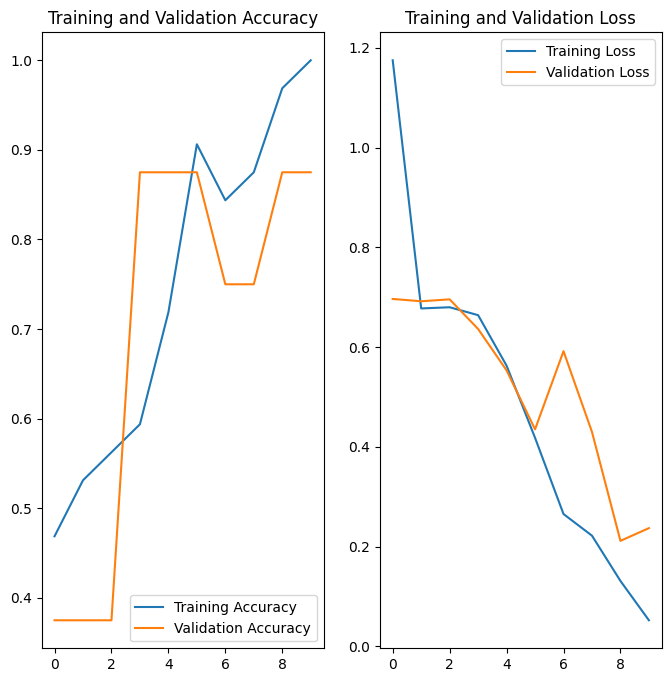

In [ ]:
# @title
# Plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 148ms/step


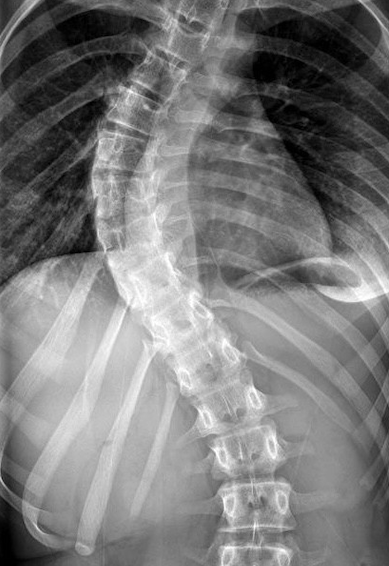

This image most likely belongs to Scoliosis with a 99.27 percent confidence.


In [ ]:
# Apply the trained CNN to test image
path = "/content/drive/MyDrive/Dataset/Unknown/scoliosis.jpg"
img = keras.preprocessing.image.load_img(
path, target_size = (img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims (img_array, 0)
predictions = model.predict (img_array)
score = tf.nn. softmax(predictions[0])
display(Image (filename=path))
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))